# Modelo Preditivo para Identificação de Fraudes <br> em Transações de Crédito  
####  Nome: Ozeas dos Santos Nascimento - Cientista de Dados<br>
| Linkedin: https://www.linkedin.com/in/ozeassantos <br>
| GitHub:   https://github.com/OzeasSantosn/ <br>
| Medium:   https://ozeassantosn.medium.com/ <br>
| Email:    ozeassantos@gmail.com <br>

==================================

Neste projeto, estarei comparando e aplicando técnicas de Machine Learning fazendo uso de modelos supervisionados a fim de classificar futuras transações como normais ou fraudulentas; A comparação e aplicação destes modelos se tornam importantes para a tomada de decisão, uma vez que busca obter o melhor desempenho na identificação de transações fraudulentas, impedindo assim, prejuízos financeiros, tanto ao E-commerce quanto aos seus demais clientes.


### INFORMAÇÕES BASE DE DADOS | DATABASE INFORMATION <br> 
Origem: portal Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).<br>
||| Time = Tempo das transações. <br>
||| Amount = Valor da transação. <br>
||| V1, V2, ... V28 = Resultados de uma transformação PCA (Realizada pelo fornecedor do dataset, devido a questões de confidencialidade dos dados considerados sensiveis).<br>
||| Class = Classificação dos dados 1 fraude, 0 Normal.<br>

-------------------<br>

In this project, I will be comparing and applying Machine Learning techniques using supervised models in order to classify future transactions as either normal or fraudulent. The comparison and application of these models become important for decision-making, as they aim to obtain the best performance in identifying fraudulent transactions, thus preventing financial losses to both the E-commerce company and its other clients.<br>

DATABASE INFORMATION<br>
Source: Kaggle portal (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).<br>
||| Time = Time of transaction.<br>
||| Amount = Transaction amount.<br>
||| V1, V2, ... V28 = Results of a PCA transformation (performed by the dataset provider, due to issues of confidentiality of sensitive data).<br>
||| Class = Data classification: 1 for fraud, 0 for normal.<br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## ANÁLISE EXPLORATÓRIA

### Carregamento dos Dados
Realizarei o carregamento dos dados baixados através do portal Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
O conjunto de dados contém transações realizadas com cartões de crédito durante o período de 2 dias, em setembro de 2013, por titulares de cartões europeus.
Utilizarei os dados carregados em nosso dataframe, denominado como "df_creditcard" .

In [2]:
df_creditcard = pd.read_csv("creditcard.csv")
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Estrutura dos dados

É importante conhecer a estrutura dos dados contidos no dataset para a realização de uma boa analise, por isto,
com a utilização do comando df_creditcard.info(), obterei informações relevantes sobre a estrutura e como os dados carregados estão em nosso dataframe.

Após a utilização do comando, observamos que o dataset contém: 284807 registros em todas as suas 31 colunas, não possuindo valores null / nan. As colunas são: Time, V1, V2,...,V28, Amount e Class.
Todos os atributos foram reconhecidos automaticamente pelo Pandas e não apresentam atributos com o tipo 'object' (que poderia indicar a presença de strings) ou 'category' (tipo especial do pandas), ou qualquer outro tipo de erro durante a leitura de nossos dados.
As colunas contem variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA, com excessão das colunas Time, Amount e Class.
Destas, 30 colunas possuem o Dtype Float, e apenas 1 (Class) com o Dtype int64.

O dataset ocupa 67.4Mb de memória.

In [4]:
df_creditcard.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dados Faltantes <br>
Confirmado a inexistência de dados faltantes e nulos, em cada atributo.

In [5]:
df_creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Registros Duplicados <br>
Também foi verificado a existência de 1081 itens duplicados em nosso database, que serão excluídos na etapa de tratamento dos dados.

In [6]:
df_creditcard.duplicated().sum()

1081

Classe Binária <br>
Os dados possuem classificação binária: 1 e 0; onde 1 classifica a transação como fraude, e 0 como normal.

In [7]:
print('Os dados estão classicados em',df_creditcard.Class.nunique(),'categorias: ', df_creditcard.Class.unique())

Os dados estão classicados em 2 categorias:  [0 1]


# Visualização Distribuição dos dados

Tendo como base o atributo class, continuaremos a nossa exploração, analisando dados classificados como normais ou fraude.

In [8]:
# Tamanho da Base de dados e distribuiçao da Classe. 0: Normal , 1: Fraude
print(f'Tamanho total da base: {df_creditcard.shape[0]}, sendo a Classe:')
print(df_creditcard['Class'].value_counts())

Tamanho total da base: 284807, sendo a Classe:
0    284315
1       492
Name: Class, dtype: int64


Podemos observar que nossa base de dados está desbalanceada, pois, menos de 1% dos dados (0.17%) estão classificados como fraudes.

In [9]:
# Esquema de Cores
cinza_claro = "#CFCDCE"
cinza_medio = "#A2A1A3"
cinza_escuro = "#787878"
azul_claro = "#8db7eb"
azul_escuro = "#253760"
color = [cinza_medio, azul_escuro]

Distribuição das classes

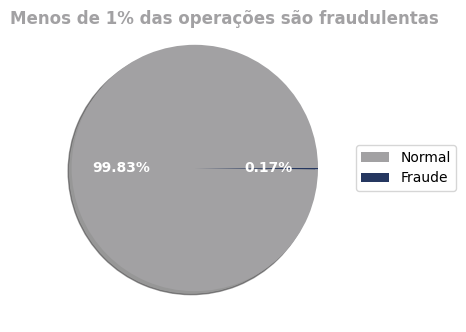

In [10]:
df_tipo_operacao = df_creditcard['Class'].value_counts()
fig,ax = plt.subplots(figsize=(4,4), subplot_kw=dict(aspect='equal'))
dados_op = df_tipo_operacao.values
legenda_op = df_tipo_operacao.index
wedges,texts,autotexts = ax.pie(dados_op, autopct='%0.2f%%',textprops=dict(color='w'), shadow=True,colors=color)

# Legenda
ax.legend(wedges,['Normal','Fraude'],
          loc='center left',
          fontsize=10,
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts, size=10,weight='bold')

# Adicionando um título
plt.text(x=-1.5, 
         y=1, 
         s='Menos de 1% das operações são fraudulentas\n',
         fontsize=12, 
         color=cinza_medio,
         weight='bold');

x_text_antes = 0.1
plt.show()

Diferença

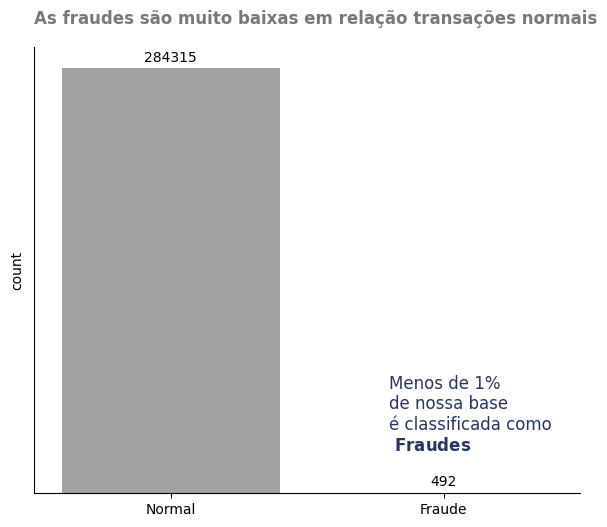

In [11]:
# Cria o gráfico
plt.rcParams['figure.figsize'] = [6, 5]
ax = sns.countplot(x='Class', data=df_creditcard, palette=color)
ax.set_xlabel('')

# Adiciona valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+0.4, p.get_height()+4530), ha='center')

# Remove as bordas do gráfico
sns.despine(ax=ax)

# Remove a escala y
ax.set(yticks=[])

# Altera os rótulos do eixo x
ax.set_xticklabels(['Normal', 'Fraude'])
plt.tight_layout()

# Adicionando um título
plt.text(x=-0.5, 
         y=300040, 
         s='As fraudes são muito baixas em relação transações normais\n',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

# texto
x_text_fraudes = 0.8
plt.text(x_text_fraudes, 
         y=45549,
         s="Menos de 1% \n"
         "de nossa base\n"
         "é classificada como\n "
         "$\\bf{Fraudes}$\n",
         verticalalignment="center",
         fontsize=12,
         color=azul_escuro);


### Time

Observamos também a distribuição na coluna Time, que representa o tempo entre as transações. Aparentemente, nenhuma anormalidade foi encontrada, não possuindo tanta relevância em nossa análise 

Time - Operações Normais

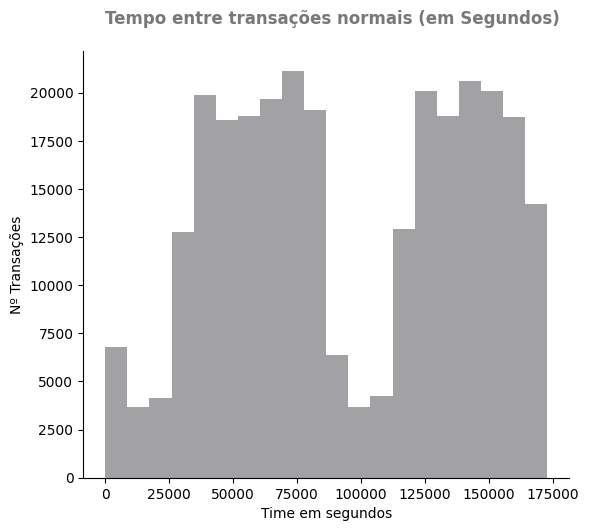

In [12]:
plt.hist(df_creditcard.Time[df_creditcard.Class == 0], bins=20, color=cinza_medio)
plt.ylabel('Nº Transações')
plt.xlabel('Time em segundos')
plt.tight_layout()
sns.despine()

# Adicionando um título
plt.text(x=-1, 
         y=22500, 
         s='Tempo entre transações normais (em Segundos)\n',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

Time - Operações Fraudes 

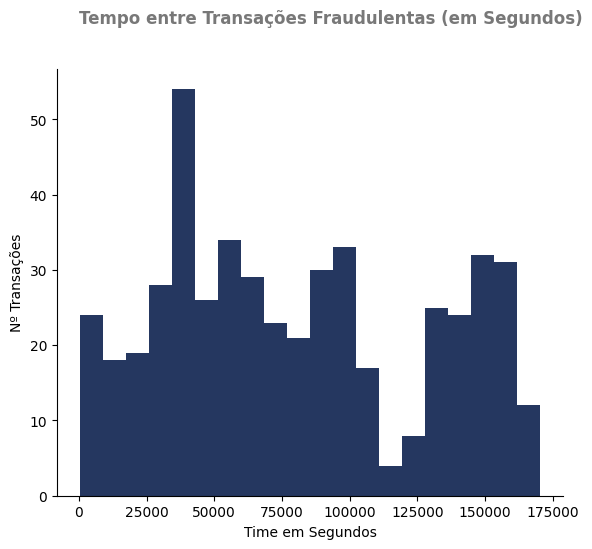

In [13]:
plt.hist(df_creditcard.Time[df_creditcard.Class == 1], bins=20, color=azul_escuro)
plt.ylabel('Nº Transações')
plt.xlabel('Time em Segundos')
sns.despine()
plt.tight_layout()

# Adicionando um título
plt.text(x=-20, 
         y=60, 
         s='Tempo entre Transações Fraudulentas (em Segundos)\n',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

Densidade - Time

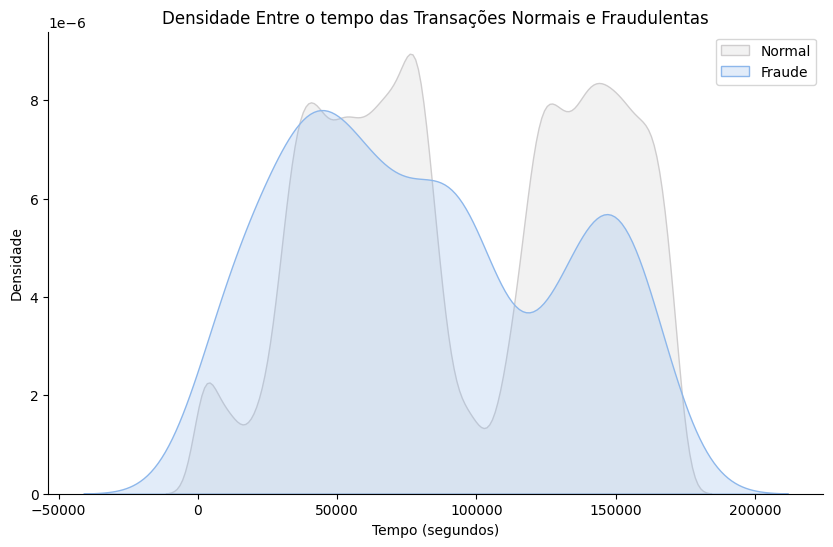

In [14]:
# Divisão dos dados de tempo das transações normais e fraudulentas
time_normal = df_creditcard.loc[df_creditcard['Class'] == 0, 'Time']
time_fraud = df_creditcard.loc[df_creditcard['Class'] == 1, 'Time']

# Plota as densidades de kernel
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(time_normal, ax=ax, label='Normais', shade=True, color= cinza_claro)
sns.kdeplot(time_fraud, ax=ax, label='Fraudes', shade=True, color= azul_claro)

# Adiciona o título e as legendas dos eixos
ax.set_title('Densidade Entre o tempo das Transações Normais e Fraudulentas')
ax.set_xlabel('Tempo (segundos)')
ax.set_ylabel('Densidade')
ax.legend(['Normal','Fraude'])
sns.despine()
plt.show()


### Amount

Verificaremos também como está a distribuição dos Valores (amount)

Amount - Transações Normais

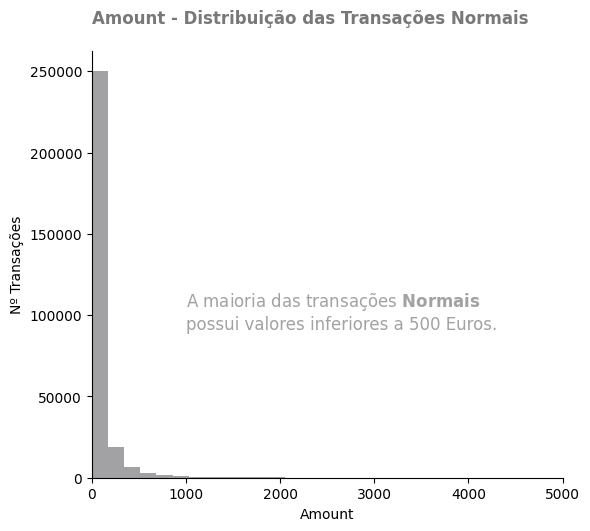

In [15]:
plt.hist(df_creditcard.Amount[df_creditcard.Class == 0], bins=150, color= cinza_medio)
plt.ylabel('Nº Transações')
plt.xlabel('Amount')
plt.xlim([0,5000])
plt.tight_layout()
sns.despine()

x_text_normais = 996.8

plt.text(x_text_normais, 
         y=95549,
         s="A maioria das transações $\\bf{Normais}$ \n" 
         "possui valores inferiores a 500 Euros.\n",
         verticalalignment="center",
         fontsize=12,
         color=cinza_medio)

# Adicionando um título
plt.text(x=1, 
         y=279502, 
         s='Amount - Distribuição das Transações Normais',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');



Amount - Transações Fraudulentas 

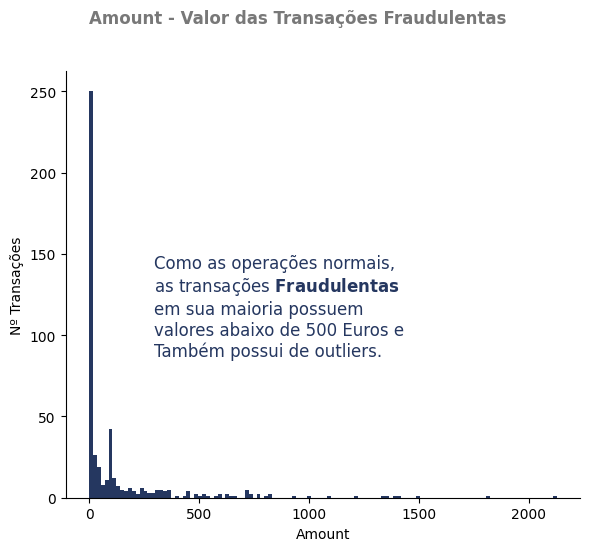

In [38]:
plt.hist(df_creditcard.Amount[df_creditcard.Class == 1], bins=120, color= azul_escuro)
plt.ylabel('Nº Transações')
plt.xlabel('Amount')
plt.tight_layout()
sns.despine()

# Texto
plt.text(x=296.8, 
         y=150,
         s="Como as operações normais,\n"
         "as transações $\\bf{Fraudulentas}$ \n" 
         "em sua maioria possuem \n" 
         "valores abaixo de 500 Euros e\n"
         "Também possui de outliers.",
         verticalalignment="top",
         fontsize=12,
         color=azul_escuro)


# Adicionando um título
plt.text(x=-0.5, 
         y=292, 
         s='Amount - Valor das Transações Fraudulentas',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

## Análise Descritiva dos Dados

A estatística descritiva, possui o objetivo de sintetizar uma série de valores de mesma natureza, permitindo uma visão global da variação desses valores, organizando e descrevendo os dados por meio de tabelas, de gráficos e de medidas descritivas.

### TIME - Análise Estatística Transações Normais e Fraudulentas

Referente ao tempo entre as transações, é possível identificar no gráfico abaixo a existência de uma interseção entre os intervalos de confiança dos boxplots, dificultando a afirmação sobre a sua distribuição.

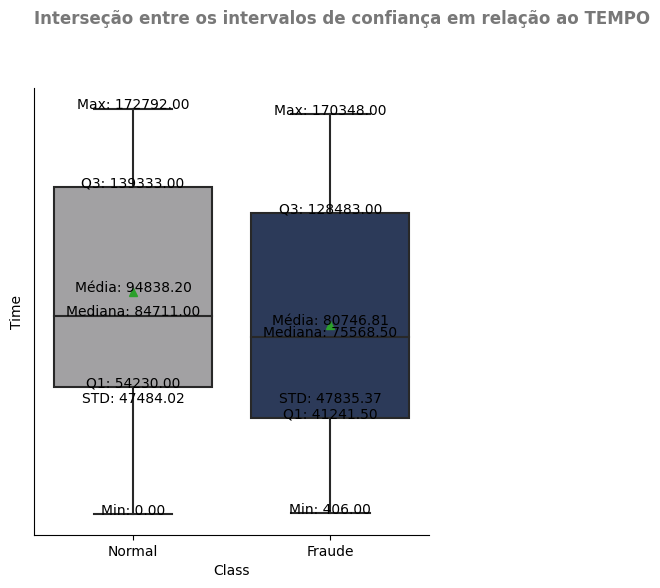

In [17]:
fig, ax = plt.subplots(figsize=(6,6), sharex=True)
sns.boxplot(x='Class', y='Time', data=df_creditcard, showmeans=True, palette=color)

# Adiciona as tags de valores para cada grupo
for i, group_name in enumerate(['Normal', 'Fraude']):
    group_data = df_creditcard[df_creditcard['Class'] == i]['Time']
    mean = group_data.mean()
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)
    minim = group_data.min()
    maxim = group_data.max()
    stdv = group_data.std()

    # Adiciona as tags de valores para cada estatística
    ax.text(i, mean + 10, f'Média: {mean:.2f}', ha='center', fontsize=10)
    ax.text(i, median + 5, f'Mediana: {median:.2f}', ha='center', fontsize=10)
    ax.text(i, q1 + 2, f'Q1: {q1:.2f}', ha='center', fontsize=10)
    ax.text(i, q3 - 10, f'Q3: {q3:.2f}', ha='center', fontsize=10)
    ax.text(i, minim - 10, f'Min: {minim:.2f}', ha='center', fontsize=10)
    ax.text(i, maxim - 10, f'Max: {maxim:.2f}', ha='center', fontsize=10)
    ax.text(i, stdv - 10, f'STD: {stdv:.2f}', ha='center', fontsize=10)

# Adicionando um título
plt.text(x=-0.5, 
         y=200200, 
         s='Interseção entre os intervalos de confiança em relação ao TEMPO\n',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold')


ax.set(yticks=[])
sns.despine()
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout()

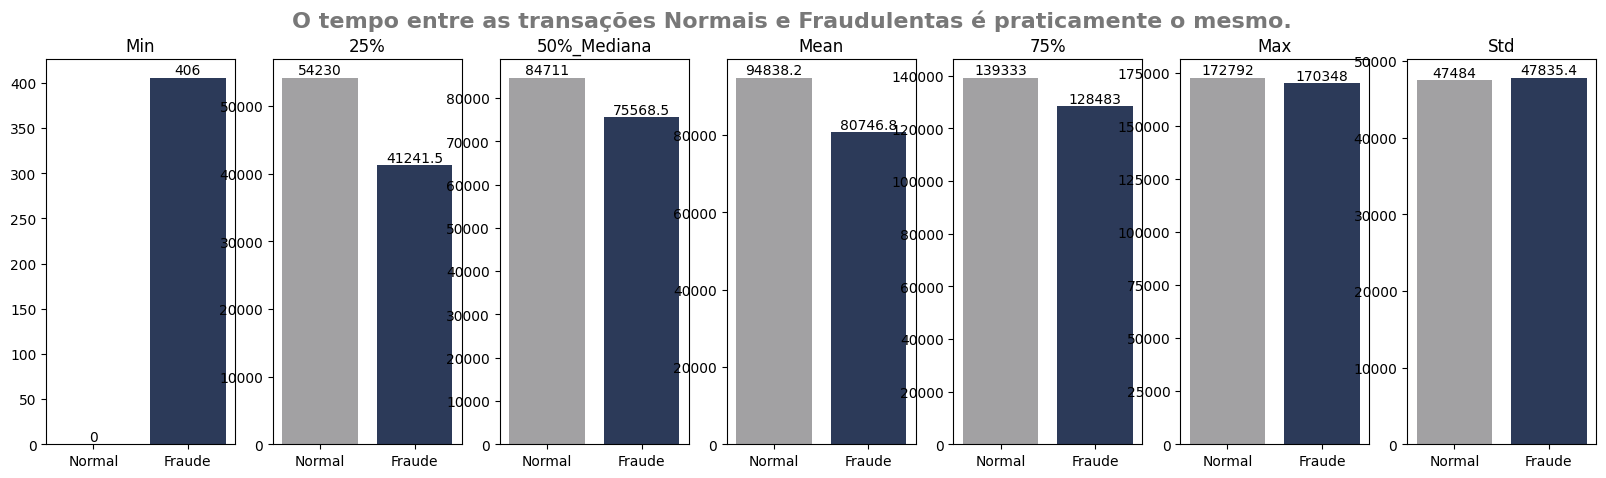

In [18]:
# Filtrando os dados e gerando medidas estatísticas
normal = df_creditcard['Time'][df_creditcard['Class']==0].describe().round(2).reset_index().pivot_table(columns='index')
fraude = df_creditcard['Time'][df_creditcard['Class']==1].describe().round(2).reset_index().pivot_table(columns='index')

# Definindo a sequencia de exibição dos gráficos
titulos = ['Min','25%','50%_Mediana','Mean','75%','Max','Std']
colunas = ['min','25%','50%','mean','75%','max','std']

# Gráfico
max_y = 0
figura, eixos = plt.subplots(1,7, figsize=(20, 5), sharex=True)

for eixo, titulo, coluna in zip(range(len(titulos)), titulos, colunas):    
    f = sns.barplot(x=['Normal','Fraude'],y=[normal[coluna][0],fraude[coluna][0]], ax=eixos[eixo], palette=color )
    f.set(title=titulo),
    
    for i in f.containers:
       f.bar_label(i,)

# Título
plt.suptitle("O tempo entre as transações Normais e Fraudulentas é praticamente o mesmo. \n", fontsize=16, fontweight="bold", color = cinza_escuro)

plt.show()

### AMOUNT - Análise Estatística Transações Normais

Temos 284315 transações classificadas como "normais", com o valor médio de 88.29 e desvio padrão das transações 250.11, indicando que as transações possuem uma variação relativamente alta.<br>
O menor valor das transações é de 0.00, o que poderia indicar transações com valores muito baixos ou gratuitos.<br>
A maioria das transações (75%) possuem valores iguais ou inferiores a 77.05 e a transação com o maior valor é de 25691.16 Euros, indicando que temos transações com valores muito altos.<br><br>

In [19]:
# Análise Estatística Transações Normais
normal_describe = df_creditcard['Amount'][df_creditcard['Class']==0].describe().round(2)
normal_describe

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

### Análise Estatística Transações Fraudulentas

Quanto as transações fraudulentas, temos 492 transações classificadas como "fraudes".<br>
A média das transações é de 122.21, sendo mais elevado do que a média das transações "normais".<br>
O desvio padrão de 256.68, indica que as transações possuem grande variação em seus valores, como observado para as transações "normais".<br>
A menor transação registrada é de 0.00, o que pode indicar que há transações com valores muito baixos ou até mesmo gratuitas e a maioria das transações  (75%) possuem valores iguais ou inferiores a 105.89.<br>
A transação com o maior valor registrada é de 2125.87, (mais baixo do que o valor máximo observado para as transações "normais").<br><br>


A média de valor das transações fraudulentas é mais elevada do que as transações "normais", o que poderia indicar que os fraudadores tendem a efetuar transações com valores mais altos.<br>
As transações normais e as transações fraudulentas também possuem uma variação relativamente alta.<br>
A maioria das transações fraudulentas possui valores relativamente baixos, mas ainda assim há transações com valores significativos. Isso pode indicar que os fraudadores tentam fazer transações de valores baixos de forma mais frequente, mas ocasionalmente tentam fazer transações de valores mais altos.


In [20]:
# Análise Estatística Transações Fraudulentas
fraude_describe = df_creditcard['Amount'][df_creditcard['Class']==1].describe().round(2)
fraude_describe

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

Com o boxplot abaixo, pôde-se observar a presença de outliers. Estes não serão removidos, pois mesmo sendo um outlier, ainda se trata de uma transação financeira, podendo ser fraudulenta ou não.

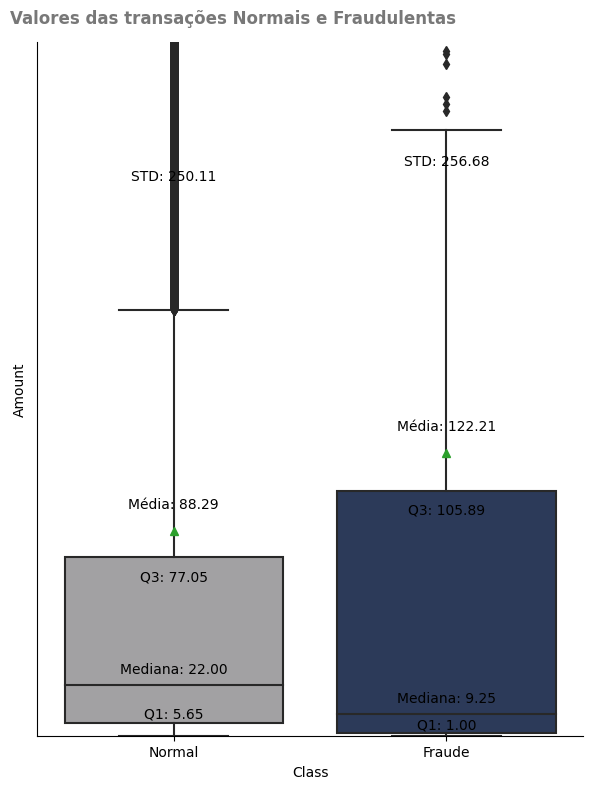

In [21]:
fig, ax = plt.subplots(figsize=(6,8), sharex=True)
sns.boxplot(x='Class', y='Amount', data=df_creditcard, showmeans=True, palette=color)

# Adiciona as tags de valores para cada grupo
for i, group_name in enumerate(['Normal', 'Fraude']):
    group_data = df_creditcard[df_creditcard['Class'] == i]['Amount']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)
    mean = group_data.mean()
    stdv = group_data.std()
    

    # Adiciona as tags de valores para cada estatística
    ax.text(i, mean + 10, f'Média: {mean:.2f}', ha='center', fontsize=10)
    ax.text(i, median + 5, f'Mediana: {median:.2f}', ha='center', fontsize=10)
    ax.text(i, q1 + 2, f'Q1: {q1:.2f}', ha='center', fontsize=10)
    ax.text(i, q3 - 10, f'Q3: {q3:.2f}', ha='center', fontsize=10)
    #ax.text(i, minim - 10, f'Min: {minim:.2f}', ha='center', fontsize=10)
    #ax.text(i, maxim - 10, f'Max: {maxim:.2f}', ha='center', fontsize=10)
    ax.text(i, stdv - 10, f'STD: {stdv:.2f}', ha='center', fontsize=10)
    

# Título
plt.text(x=-0.6, 
         y=299, 
         s='Valores das transações Normais e Fraudulentas\n',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');


sns.despine()
plt.ylim(0, 300)
ax.set(yticks=[])
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout()

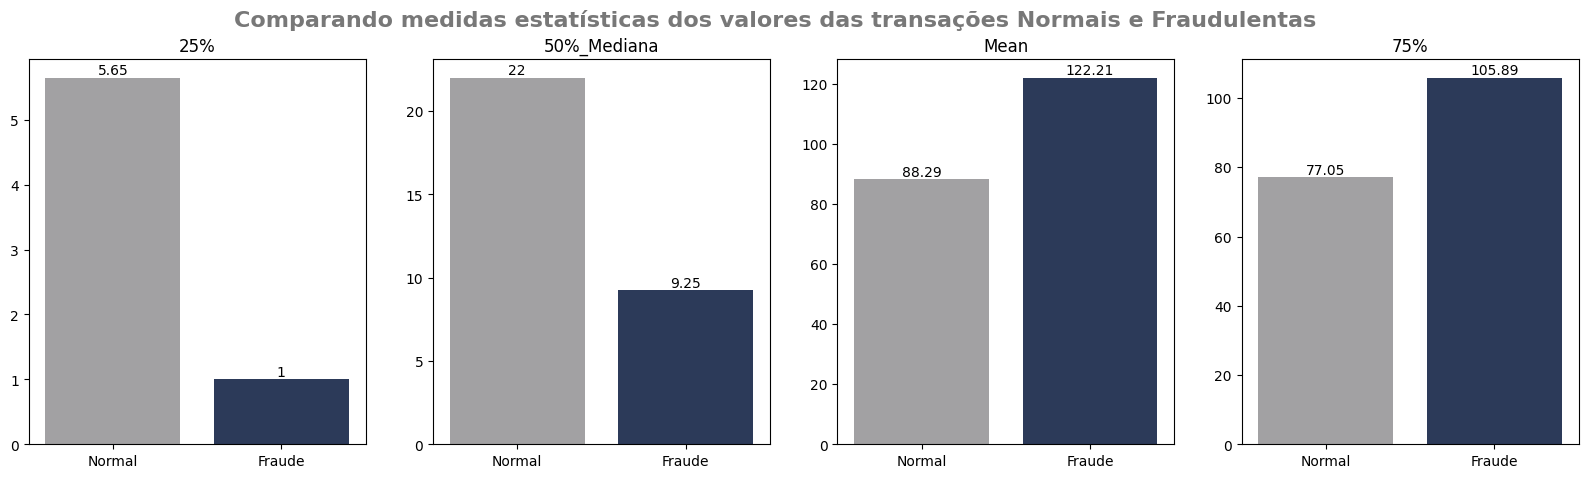

In [22]:
# Filtrando os dados e gerando medidas estatísticas
normal = df_creditcard['Amount'][df_creditcard['Class']==0].describe().round(2).reset_index().pivot_table(columns='index')
fraude = df_creditcard['Amount'][df_creditcard['Class']==1].describe().round(2).reset_index().pivot_table(columns='index')

# Definindo a sequencia de exibição dos gráficos
titulos = ['25%','50%_Mediana','Mean','75%']
colunas = ['25%','50%','mean','75%']

# Gráfico
max_y = 0
figura, eixos = plt.subplots(1,4, figsize=(20, 5), sharex=True)

for eixo, titulo, coluna in zip(range(len(titulos)), titulos, colunas):    
    f = sns.barplot(x=['Normal','Fraude'],y=[normal[coluna][0],fraude[coluna][0]], ax=eixos[eixo], palette=color )
    f.set(title=titulo),
    
    for i in f.containers:
       f.bar_label(i,)

# Título
plt.suptitle("Comparando medidas estatísticas dos valores das transações Normais e Fraudulentas \n", fontsize=16, fontweight="bold", color = cinza_escuro)

plt.show()

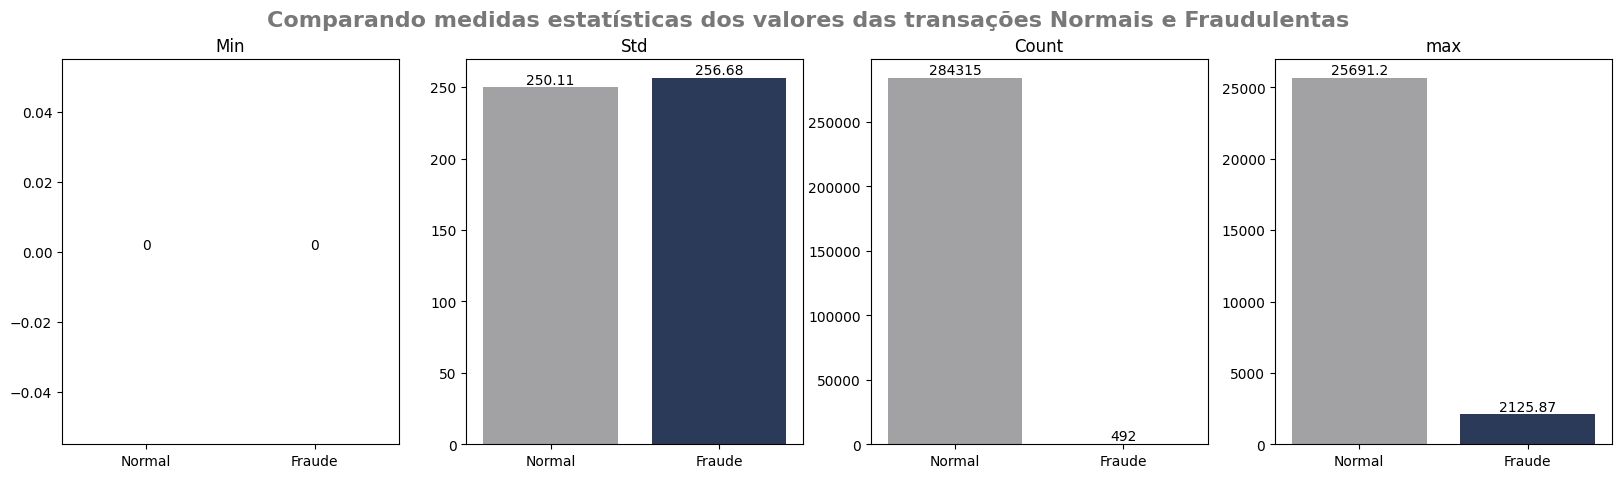

In [23]:
# Definindo a sequencia de exibição dos gráficos
titulos = ['Min','Std','Count','max']
colunas = ['min','std','count','max']

# Gráfico
max_y = 0
figura, eixos = plt.subplots(1,4, figsize=(20, 5), sharex=True)

for eixo, titulo, coluna in zip(range(len(titulos)), titulos, colunas):    
    f = sns.barplot(x=['Normal','Fraude'],y=[normal[coluna][0],fraude[coluna][0]], ax=eixos[eixo], palette=color)
    f.set(title=titulo),
    
    for i in f.containers:
       f.bar_label(i,)

# Título
plt.suptitle("Comparando medidas estatísticas dos valores das transações Normais e Fraudulentas \n", fontsize=16, fontweight="bold", color = cinza_escuro)

plt.show()

## Análise de outliers

Outliers Transações Normais

(184.14999999999998, 4000.0)

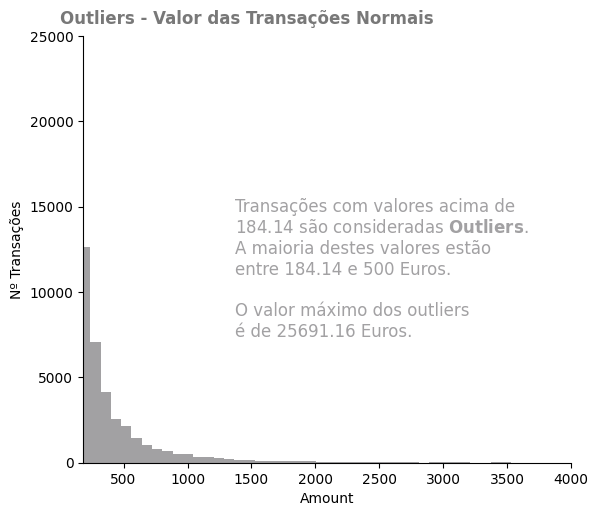

In [24]:
group_data = df_creditcard.Amount[df_creditcard.Class == 0]
q1 = group_data.quantile(0.25)
q3 = group_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


plt.hist(group_data, bins=320, color= cinza_medio)
plt.ylabel('Nº Transações')
plt.xlabel('Amount')
plt.tight_layout()
sns.despine()

# Adicionando um título
plt.text(x=-0.5, 
         y=25711, 
         s='Outliers - Valor das Transações Normais',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');


# Texto
plt.text(x=1369.8, 
         y=15505,
         s="Transações com valores acima de \n"
         "184.14 são consideradas $\\bf{Outliers}$. \n" 
         "A maioria destes valores estão \n" 
         "entre 184.14 e 500 Euros.\n\n"
         "O valor máximo dos outliers \né de 25691.16 Euros.",
         verticalalignment="top",
         fontsize=12,
         color=cinza_medio)





plt.ylim(0, 25000)
plt.xlim(upper_bound, 4000) # group_data.max())

Outliers Transações Fraudes

(263.225, 2125.87)

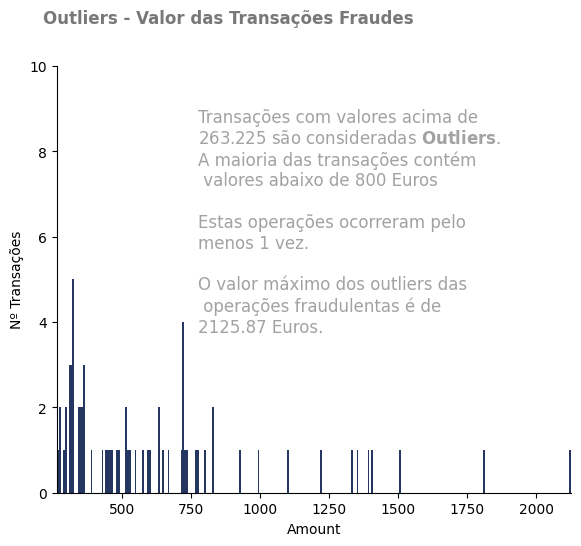

In [25]:
group_data = df_creditcard.Amount[df_creditcard.Class == 1]
q1 = group_data.quantile(0.25)
q3 = group_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


plt.hist(group_data, bins=320, color= azul_escuro)
plt.ylabel('Nº Transações')
plt.xlabel('Amount')
plt.tight_layout()
sns.despine()

# Adicionando um título
plt.text(x=211.5, 
         y=11, 
         s='Outliers - Valor das Transações Fraudes',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

# Texto
plt.text(x=772.8, 
         y=9,
         s="Transações com valores acima de \n"
         "263.225 são consideradas $\\bf{Outliers}$. \n" 
         "A maioria das transações contém \n valores abaixo de 800 Euros \n\n"
         "Estas operações ocorreram pelo \n" "menos 1 vez.\n\n"
         "O valor máximo dos outliers das \n operações fraudulentas é de \n2125.87 Euros.",
         verticalalignment="top",
         fontsize=12,
         color=cinza_medio)


plt.ylim(0, 10)
plt.xlim(upper_bound, group_data.max())

#### Análise Bivariada;

Uma dúvida que tive era se existia alguma relação entre causa e efeito entre as duas variáveis numéricas "Time" e "Amount". Não significando que uma é a causa da outra, mas gostaria de verificar se existe alguma relação e qual poderia ser a sua intensidade (Positiva, Negativa, Neutra ou Não Linear).

Ao gerar os gráficos abaixo, pude identificar que existe uma relação neutra nos 2 tipos de operação, além de fácil visualização dos outlies (pontos extremos) e os grupos de dados. Pode-se observar que não há presença de outliers na variável "Time" de ambas as transações, mas as encontramos nas variaveis 'Amount'.

Nas transações normais, a maioria das operações estão agrupados com valores variando entre 0 à 5000 Euros, e com intervalos de tempo entre 0 e 175000 segundos, porém, com acentuada redução de valores em aproximadamente 100000 segundos. Os outliers chegam a 25000 dolares.

Quanto as transações fraudulentas, a maioria das operações estão agrupados com valores variando entre 0 à aproximadamente 500 dolares com intervalos de tempo variando entre 0 e 175000 segundos, e o outlies passam de 20000 dolares.

In [26]:
normal = df_creditcard.loc[df_creditcard['Class']==0]
fraude = df_creditcard.loc[df_creditcard['Class']==1]

Amount x Time - Normal

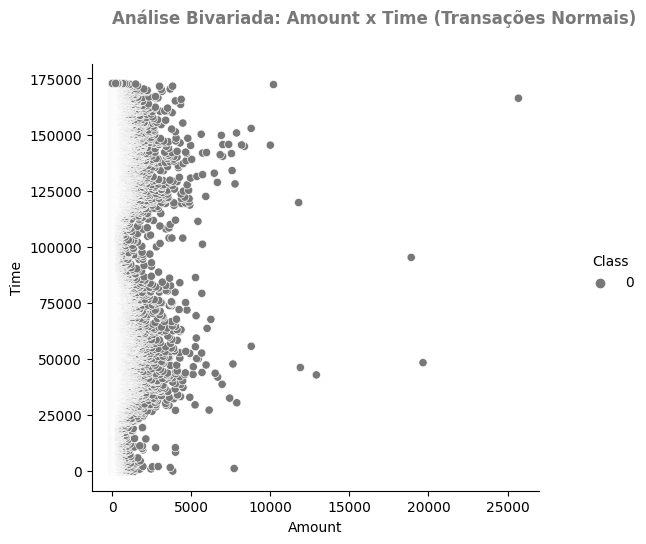

In [27]:
lst_cinza = [cinza_escuro] 
sns.relplot(x='Amount', y='Time', hue = 'Class', data =normal, palette=lst_cinza)
plt.tight_layout()


# Título
plt.text(x=1, 
         y=199292, 
         s='Análise Bivariada: Amount x Time (Transações Normais)',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

Amount x Time - Fraudes

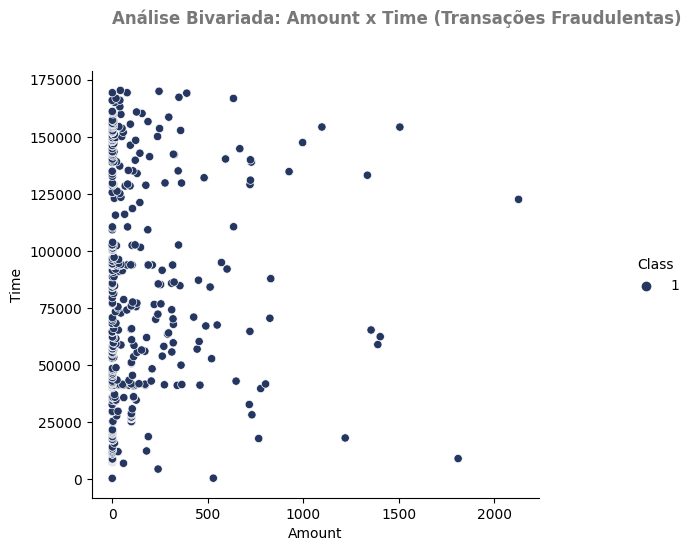

In [28]:
lst_azul = [azul_escuro]
sns.relplot(x='Amount', y='Time', hue = 'Class', color = 'orange', data =fraude, palette=lst_azul)
plt.tight_layout()

# Título
plt.text(x=1, 
         y=199292, 
         s='Análise Bivariada: Amount x Time (Transações Fraudulentas)',
         fontsize=12, 
         color=cinza_escuro,
         weight='bold');

# Tratamento dos Dados

Limpeza dos dados

Nesta etapa, realizaremos a limpeza dos dados, pois embora nossos dados não possua valores null/nan, percebemos que existem 1081 registros duplicados.
Com a celula abaixo, removeremos os itens duplicados de nosso dataframe

In [29]:
print('Total de registros: ',df_creditcard.shape[0], '\nTotal de registros duplicados: ',df_creditcard.duplicated().sum())
df_creditcard = df_creditcard.drop_duplicates()
print('Total de registros após remover duplicados: ',df_creditcard.shape[0])

Total de registros:  284807 
Total de registros duplicados:  1081
Total de registros após remover duplicados:  283726


Normalização Colunas Time e Amount

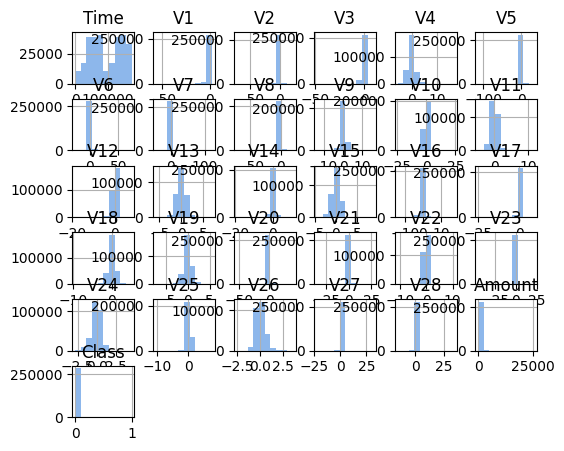

In [30]:
df_creditcard.hist(color = azul_claro)
plt.show()

Time Antes Normalização

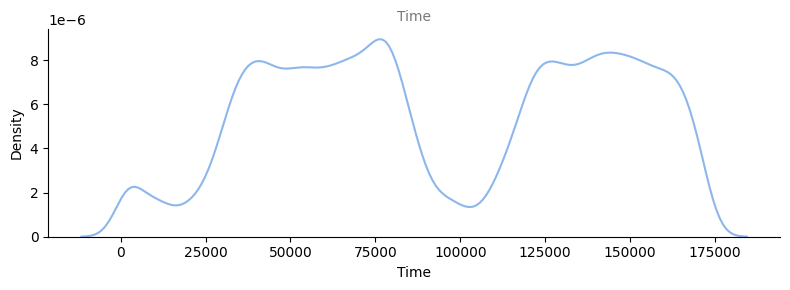

In [31]:
# Time
fig = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.kdeplot(df_creditcard['Time'], label="Class 0", y=None, shade=None, common_norm = True, color = azul_claro)
plt.title('Time', fontsize=10, color = cinza_escuro)
sns.despine()
plt.tight_layout()

Amount Antes Normalização

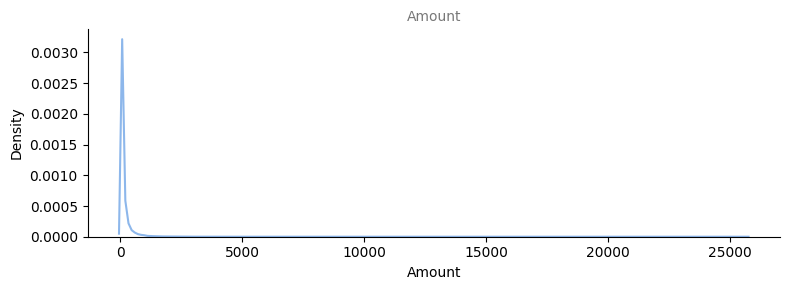

In [32]:
# Amount
fig = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.kdeplot(df_creditcard['Amount'], label="Class 0", y=None, shade=None, common_norm = True, color = azul_claro)
plt.title('Amount', fontsize=10, color = cinza_escuro)
sns.despine()
plt.tight_layout()

### Aplicação Normalização - MinMaxScaler()

In [33]:
col_df = df_creditcard.columns
col = []
for i in col_df:
    col.append(i)


In [34]:
mms = MinMaxScaler()
df_creditcard_norm = df_creditcard.copy()

df_creditcard_norm = mms.fit_transform(df_creditcard_norm.iloc[:,0:(df_creditcard_norm.shape[1])])
df_creditcard_norm = pd.DataFrame(df_creditcard_norm)
df_creditcard_norm.columns=col
df_creditcard_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
283722,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
283723,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
283724,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


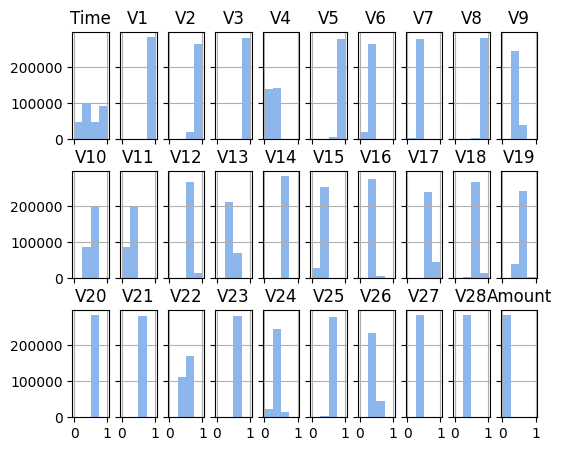

In [35]:
fig, ax = plt.subplots(3,10, sharex='col', sharey='row')

cont=0
for i in range(3):
    for j in range(10):
        df_creditcard_norm.hist(column = df_creditcard_norm.columns[cont], bins = 4, ax=ax[i,j], figsize=(610, 80), color = azul_claro)
        cont+=1

Time Normalizado

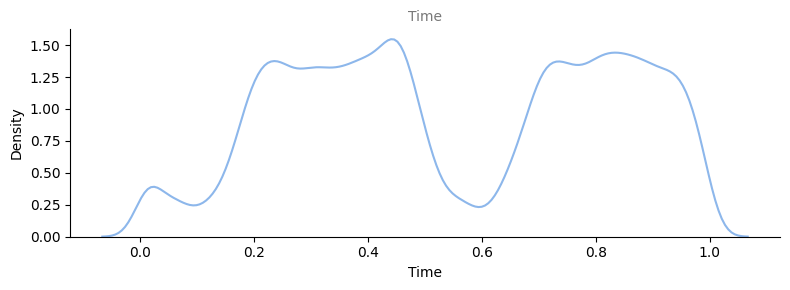

In [36]:
# Time Normalizado
fig = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.kdeplot(df_creditcard_norm['Time'], label="Class 0", y=None, shade=None, common_norm = True, color = azul_claro)
plt.title('Time', fontsize=10, color = cinza_escuro)
sns.despine()
plt.tight_layout()

Amount Normalizado

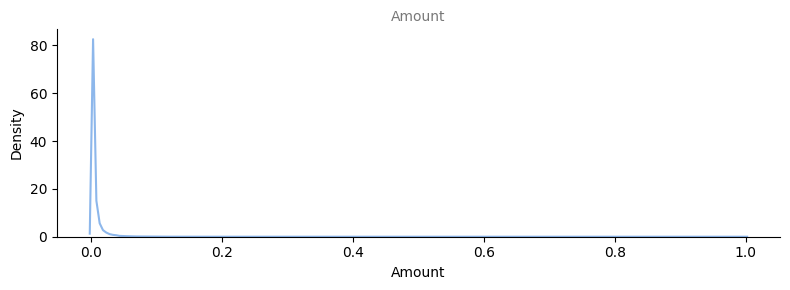

In [37]:
# Amount Normalizado
fig = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
sns.kdeplot(df_creditcard_norm['Amount'], label="Class 0", y=None, shade=None, common_norm = True, color = azul_claro)
plt.title('Amount', fontsize=10, color = cinza_escuro)
sns.despine()
plt.tight_layout()

# Machine Learning
Previsões com dados DESBALANCEADOS

#### Testandos os modelos

Objetivo: Neste código treinarei e avaliarei quatro modelos de classificação (Regressão Logística, Árvore de Decisão, Floresta Aleatória e XGBoost) para detectar fraudes durante as transações. Devido ao desbalanceamento dos dados, utilizarei o KFold (validação cruzada) com o balanceamento de classes (SMOTE) e o cross_val_score para avaliar as métricas de cada kfold. Obterei também o score recall, matriz de confusão, a curva ROC e o scatter plot para cada modelo. O objetivo é avaliar o desempenho dos modelos e selecionar o melhor para detecção de fraudes em transações.

In [36]:
# Divisão da base
X = df_creditcard_norm.drop('Class',axis=1)
y = df_creditcard_norm[['Class']] #np.ravel(

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56651
         1.0       0.06      0.89      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746



c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56651
         1.0       0.06      0.88      0.12        94

    accuracy                           0.98     56745
   macro avg       0.53      0.93      0.55     56745
weighted avg       1.00      0.98      0.99     56745



c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56651
         1.0       0.07      0.93      0.13        94

    accuracy                           0.98     56745
   macro avg       0.53      0.95      0.56     56745
weighted avg       1.00      0.98      0.99     56745



c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56650
         1.0       0.07      0.91      0.12        95

    accuracy                           0.98     56745
   macro avg       0.53      0.94      0.56     56745
weighted avg       1.00      0.98      0.99     56745



c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56650
         1.0       0.06      0.92      0.11        95

    accuracy                           0.98     56745
   macro avg       0.53      0.95      0.55     56745
weighted avg       1.00      0.98      0.99     56745

LogisticRegression(max_iter=500, random_state=42) - CV recall score: 0.92
LogisticRegression(max_iter=500, random_state=42) - Test recall score: 0.90
►►►►►►►►►►►►►►►►►►►►►
DecisionTreeClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.36      0.79      0.49        95

    accuracy                           1.00     56746
   macro avg       0.68      0.89      0.74     56746
weighted avg       1.00      1.00      1.00     56746

DecisionTreeClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     566

C:\Users\ozeas\AppData\Local\Temp\ipykernel_21372\3865856844.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.87      0.82      0.84        95

    accuracy                           1.00     56746
   macro avg       0.93      0.91      0.92     56746
weighted avg       1.00      1.00      1.00     56746



C:\Users\ozeas\AppData\Local\Temp\ipykernel_21372\3865856844.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.93      0.83      0.88        94

    accuracy                           1.00     56745
   macro avg       0.96      0.91      0.94     56745
weighted avg       1.00      1.00      1.00     56745



C:\Users\ozeas\AppData\Local\Temp\ipykernel_21372\3865856844.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.85      0.78      0.81        94

    accuracy                           1.00     56745
   macro avg       0.92      0.89      0.91     56745
weighted avg       1.00      1.00      1.00     56745



C:\Users\ozeas\AppData\Local\Temp\ipykernel_21372\3865856844.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56650
         1.0       0.89      0.83      0.86        95

    accuracy                           1.00     56745
   macro avg       0.94      0.92      0.93     56745
weighted avg       1.00      1.00      1.00     56745



C:\Users\ozeas\AppData\Local\Temp\ipykernel_21372\3865856844.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56650
         1.0       0.88      0.82      0.85        95

    accuracy                           1.00     56745
   macro avg       0.94      0.91      0.92     56745
weighted avg       1.00      1.00      1.00     56745

RandomForestClassifier(n_jobs=-1, random_state=42) - CV recall score: 1.00
RandomForestClassifier(n_jobs=-1, random_state=42) - Test recall score: 0.82
►►►►►►►►►►►►►►►►►►►►►
XGBClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.81      0.83      0.82        95

    accuracy                           1.00     56746
   macro avg       0.90      0.92      0.91     56746
weighted avg       1.00      1.00      1.00     56746

XGBClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         

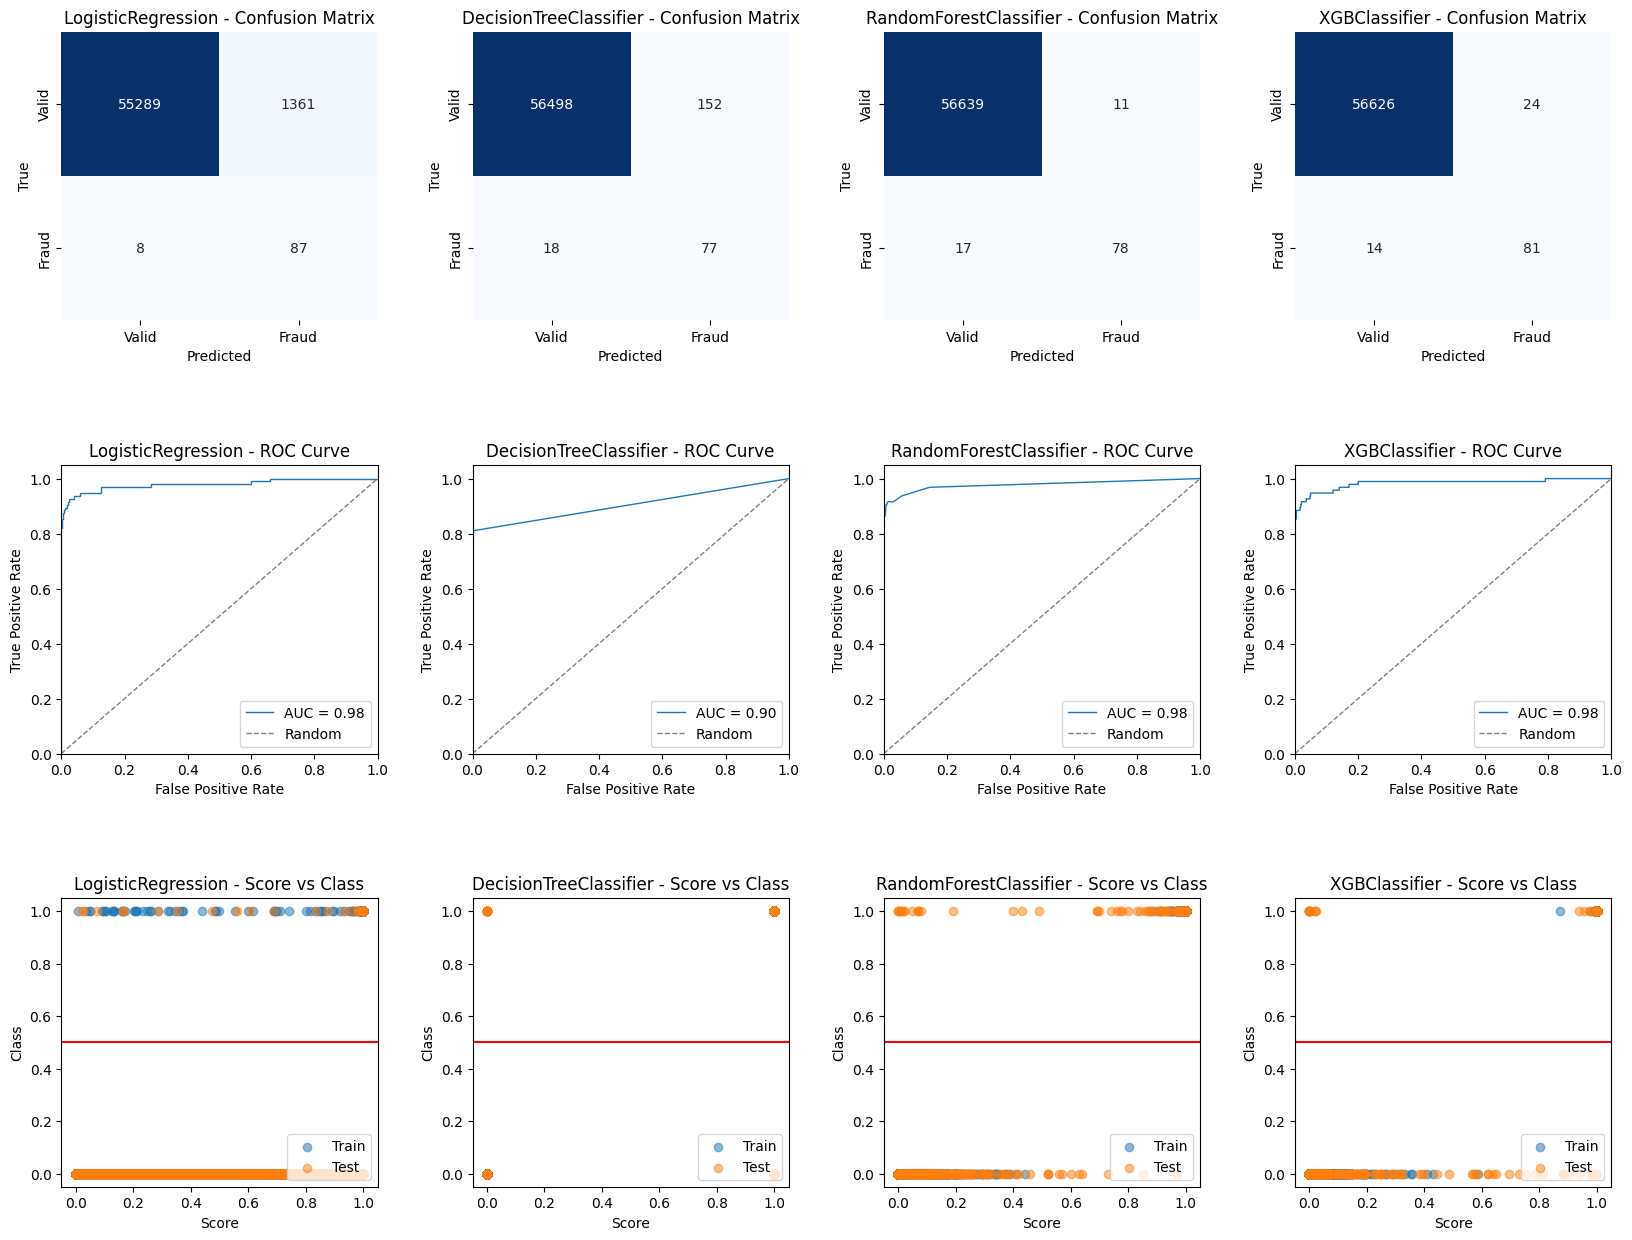

In [44]:
# definir k-fold para validação cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# definir modelos a serem testados
models = [
    LogisticRegression(max_iter=500, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=-1),
    XGBClassifier(random_state=42)
]

fig, axs = plt.subplots(nrows=3, ncols=len(models), figsize=(20,15))

# treinar e avaliar os modelos
for i, model in enumerate(models):
    cv_recall_scores = []
    test_recall_scores = []
    
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # balancear as classes com SMOTE apenas nos dados de treinamento
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        # treinar modelo no conjunto de treino
        model.fit(X_train_balanced, y_train_balanced)
        
        # avaliar recall do modelo no conjunto de treino e teste
        train_recall_score = recall_score(y_train_balanced, model.predict(X_train_balanced))
        test_recall_score = recall_score(y_test, model.predict(X_test))
        
        cv_recall_scores.append(train_recall_score)
        test_recall_scores.append(test_recall_score)

        y_pred = model.predict(X_test)
        print(f'{str(model.__class__.__name__)}:\n{classification_report(y_test, y_pred)}')


     # média do recall na validação cruzada
    cv_recall_mean = np.mean(cv_recall_scores)
    print(f'{str(model)} - CV recall score: {cv_recall_mean:.2f}')
    
    # média do recall no conjunto de teste
    test_recall_mean = np.mean(test_recall_scores)
    print(f'{str(model)} - Test recall score: {test_recall_mean:.2f}')
    
    print('►►►►►►►►►►►►►►►►►►►►►')    
        
    # plotar matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axs[0][i])
    axs[0][i].set_xlabel('Predicted')
    axs[0][i].set_ylabel('True')
    axs[0][i].xaxis.set_ticklabels(['Valid', 'Fraud'])
    axs[0][i].yaxis.set_ticklabels(['Valid', 'Fraud'])
    axs[0][i].set_title(f'{model.__class__.__name__} - Confusion Matrix')

    # plotar curva ROC
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    axs[1][i].plot(fpr, tpr, lw=1, label=f'AUC = {roc_auc:.2f}')
    axs[1][i].plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
    axs[1][i].set_xlim([0.0, 1.0])
    axs[1][i].set_ylim([0.0, 1.05])
    axs[1][i].set_xlabel('False Positive Rate')
    axs[1][i].set_ylabel('True Positive Rate')
    axs[1][i].set_title(f'{model.__class__.__name__} - ROC Curve')
    axs[1][i].legend(loc="lower right")

    # plotar scatter plot
    y_score_train = model.predict_proba(X_train)[:, 1]
    y_score_test = model.predict_proba(X_test)[:, 1]
    axs[2][i].scatter(y_score_train, y_train, alpha=0.5, label='Train')
    axs[2][i].scatter(y_score_test, y_test, alpha=0.5, label='Test')
    axs[2][i].axhline(y=0.5, color='r', linestyle='-')
    axs[2][i].set_xlabel('Score')
    axs[2][i].set_ylabel('Class')
    axs[2][i].set_title(f'{model.__class__.__name__} - Score vs Class')
    axs[2][i].legend(loc="lower right")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### Classification_Report // Saídas do Kfold

Para cada modelo, executei um loop separando os dados em conjuntos de treinamento e teste usando a função kfold.split(). Utilizei o SMOTE para realizar o balanceamento de classe nos dados de treinamento. Foi gerado também, a avaliação do desempenho do modelo nos conjuntos de treinamento e teste e as visualizações de matriz de confusão, curva ROC e scatter plot.<br>

A saída do código é um classification report para cada modelo, que contém várias métricas de avaliação do desempenho do modelo, incluindo precision, recall, f1-score e accuracy e com estas informações é possível avaliar o desempenho dos modelos e escolher o melhor para a prevenção de fraudes.<br>

No primeiro fold, temos a maior precisão, recall e f1-score para a classe 1 (fraude), enquanto no terceiro fold temos os menores valores dessas métricas.

Estas variações acontecem devido cada fold ter diferentes amostras dos dados e a aleatoriedade. Por sua variedade não ser muito grande, temos a indicação de que o modelo mantem bom desempenho em diferentes grupos de dados (Se as métricas variarem muito entre as iterações, pode ser um sinal de que o modelo não está generalizando bem ou que os dados não estão sendo divididos adequadamente nas partições de treinamento e teste.)


Recall é uma métrica que mede a proporção de instâncias verdadeiramente positivas que foram corretamente classificadas pelo modelo em relação ao total de instâncias positivas no conjunto de dados.

Durante a utilização da validação cruzada, coletei a média do recall para validação cruzada e conjunto de teste para cada modelo e ao comparar os resultados, observei que:

Regressão Logística: O valor de recall para validação cruzada é de 0,92, e o recall para o conjunto de teste é de 0,90.
Decision Tree: O valor de recall para validação cruzada é de 1,00, e o recall para o conjunto de teste é de 0,79.
Random Florest: O valor de recall para validação cruzada é de 1,00, e o recall para o conjunto de teste é de 0,82.
XGBoost: O valor de recall para validação cruzada é de 1,00, e o recall para o conjunto de teste é de 0,83.

Embora os modelos tenham bons valores de recall e sejam capazes de classificar corretamente as instâncias positivas, o desempenho desses modelos no conjunto de teste variou, com alguns valores mais baixos de recall, indicando a possibilidade de ter sofrido overfiting se ajustando demais nos dados de treinamento. Sendo assim importante ajustar os hiperparametros, e considerar tanto os valores de validação cruzada quanto de teste ao avaliar o desempenho do modelo.

### Média Recall Validação Cruzada e Média do Recall do Conjunto de Teste Vs Classification Report

Uma dúvida que tive era 'Por que os valores de recall são diferentes entre a validação cruzada e o classification report', e descobri que os valores de recall podem ser diferentes por algumas razões, como por exemplo diferenças nos dados usados para o treinamento e validação ou devido ao método de validação cruzada utilizado. No caso, os valores de recall médio na validação cruzada (CV recall score) e no conjunto de teste (Test recall score) são apresentados para cada modelo.

Pode-se observar que os modelos DecisionTreeClassifier e RandomForestClassifier possuem valores de recall no conjunto de teste menores do que os valores na validação cruzada, e que o modelo XGBClassifier apresentou valores de recall no conjunto de teste similar ao da validação cruzada. O modelo LogisticRegression apresentou um valor de recall no conjunto de teste um pouco menor do que na validação cruzada.

Devido as variações aleatórias nos dados de teste e validação utilizados estas diferenças podem acontecer, mas de modo geral os valores de recall no conjunto de teste serão menores do que a validação cruzada porque durante o treino na validação cruzada é utilizado diferentes subconjuntos dos dados podendo de "ver" mais dados do que quando é avaliado apenas em um conjunto de teste fixo. O modelo também pode estar enfrentando exemplos que não são representativos do conjunto de dados como um todo, o que pode afetar seu desempenho.

### Curva ROC

Para avaliar a qualidade do modelo utilizei a métrica da curva ROC, a AUC (Area Under the Curve) para obter a probabilidade de que o modelo classificará corretamente uma amostra positiva aleatória mais alta do que a probabilidade de acertar a amostra negativa aleatória.

As AUCs dos modelos apresentados mostram bons desempenhos dos modelos, com AUCs próximas de 1, mostrando que são capazes de classificar corretamentediferenciando as classes positivas e negativas.

### Matriz de Confusão

As matrizes de confusão mostram a quantidade de amostras classificadas corretamente (verdadeiros positivos e verdadeiros negativos) e incorretamente (falsos positivos e falsos negativos) pelo modelo para cada classe (neste caso, fraudes e transações normais).

Para todas as matrizes, a classe "valid" (transações normais) é a classe majoritária.

##### Matriz de confusão da Logistic Regression:

A Logistic Regression classificou corretamente 87 transações como fraude (TP), mas errou quando classificou 1361 transações normais como fraude (FP). O modelo acertou a grande maioria das transações normais (TN), mas deixou de classificar 8 fraudes (FN).

##### Matriz de confusão da Decision Tree:

A Decision Tree classificou corretamente 77 transações como fraude (TP), mas errou ao classificar 152 transações normais como fraude (FP). O modelo acertou a grande maioria das transações normais (TN), mas deixou de classificar 18 fraudes (FN).

##### Matriz de confusão da Random Forest:

A Random Forest acertou 78 exemplos como fraude (TP) e somente 11 transações normais foram classificadas erroneamente como fraude (FP). O modelo acertou ao classificar a grande maioria das transações normais (TN), mas deixou de classificar 17 fraudes (FN).

##### Matriz de confusão da XGBClassifier:

A XGBClassifier classificou corretamente 81 exemplos como fraude (TP) e apenas 24 transações normais foram classificadas erroneamente como fraude (FP). O modelo também acertou a grande maioria das transações normais (TN), mas deixou de classificar 14 transações fraudulentas (FN).

Os modelos Random Forest e a XGBClassifier apresentaram os melhores resultados na detecção de fraudes, pois tiveram um número menor de falsos positivos. A Logistic Regression apresentou uma taxa elevada de falsos positivos, o que pode ser ruim quando os custos dos falsos positivos forem altos. A Decision Tree apresentou uma taxa intermediária de falsos positivos e a XGBClassifier teve um número um pouco maior de falsos negativos. A escolha do modelo mais adequado vai depender de vários outros fatores, dependendo do objetivo do modelo e a analise mais aprofundada das métricas relevantes e o desempenho geral do modelo.

### Comparação: Matriz de confusão, Curva roc, media e desvio padrao do recall e o classification report

A matriz de confusão fornece informações importantes sobre como o modelo está se saindo em termos de classificação, mas em comparação com outras métricas percebemos que as outras métricas fornecem uma visão mais ampla sobre o desempenho geral do modelo.

Por exemplo: A curva ROC fornece uma medida da sensibilidade e especificidade do modelo para diferentes valores de limite de classificação que ajudaría na avaliação do desempenho geral do modelo e ajudar a determinar qual limite de classificação é o mais adequado para uma determinada aplicação.

A média e o desvio padrão do recall da validação cruzada fornecem uma medida da capacidade do modelo de detectar corretamente os casos positivos em uma variedade de conjuntos de dados, sendo útil para entender a capacidade do modelo de generalizar para novos conjuntos de dados e determinar se o modelo está com overfitting ou underfitting em seus dados.

O classification report detalha mais sobre o desempenho do modelo (precisão, recall, f1-score e suporte), ajudando na avaliação do desempenho do modelo em cada classe individualmente e identificar quais classes estão sendo classificadas corretamente ou incorretamente.

Em geral, escolher qual deverá ser o melhor modelo dependederá das prioridades em termos de métricas. Se a detecção correta de casos positivos é crítica, um modelo com alta sensibilidade e recall pode ser mais adequado, mesmo que contenha uma taxa mais alta de falsos positivos. Caso a precisão seja mais importante, um modelo com uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos pode ser a melhor escolha.